# Flight Price Prediction Project

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on

- Time of purchase patterns (making sure last-minute purchases are expensive)
- Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

So, we have to work on a project where we collect data of flight fares with other features and work to make a model to predict fares of flights.

## Importing Libraries/Packages

In [1]:
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from scipy import stats
from scipy.stats import zscore

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

#model evaluation
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV,LassoCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")

In [2]:
df = pd.read_excel("Flight_Price_Dataset.xlsx")
df

,Unnamed: 0,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,0,Air India,AI-887,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"6,480"
1,1,Vistara,UK-975,New Delhi,Mumbai,05:55,07:55,2h 00m,Non Stop,Free Meal,"8,578"
2,2,Vistara,UK-951,New Delhi,Mumbai,14:20,16:30,2h 10m,Non Stop,Free Meal,"8,578"
3,3,Vistara,UK-933,New Delhi,Mumbai,15:30,17:40,2h 10m,Non Stop,Free Meal,"8,578"
4,4,Vistara,UK-941,New Delhi,Mumbai,16:55,19:05,2h 10m,Non Stop,Free Meal,"8,578"
...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,Air India,AI-768/805/611,Kolkata,Jaipur,15:30,13:25,21h 55m,2 Stop(s),Free Meal,"29,082"
1596,1596,Air India,AI-770/665/611,Kolkata,Jaipur,20:15,13:25,17h 10m,2 Stop(s),Free Meal,"31,182"
1597,1597,Air India,AI-770/887/611,Kolkata,Jaipur,20:15,13:25,17h 10m,2 Stop(s),Free Meal,"31,182"
1598,1598,Air India,AI-785/569/611,Kolkata,Jaipur,17:00,13:25,20h 25m,2 Stop(s),Free Meal,"31,182"


Feature Information

- Airline: Name of the airline
- Flight_Code: code of the flight
- Departure_time: Time of departure of flight from the source location
- Arrival_Time: Time of arrival at destination
- Duration: Total time of the journey from source to destination
- Source: City name from where the flight is departing
- Destination: Name of the city where flight is arriving
- Meal_availability : Information about meal fare
- Total_stops: Number of stops during the journey
- Price : Flight fare

In the above cell we can see that our dataset includes label "Price" and the remaining feature columns wil help in predicting the flight price to various places. As price is a continous value, this makes a Regression problem.

In [3]:
#checking the dimension of the dataset
df.shape

(1600, 11)

In [4]:
#checking data type and memory information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         1600 non-null   int64 
 1   Airline            1600 non-null   object
 2   Flight_Code        1600 non-null   object
 3   Source             1600 non-null   object
 4   Destination        1600 non-null   object
 5   Departure_Time     1600 non-null   object
 6   Arrival_Time       1600 non-null   object
 7   Duration           1600 non-null   object
 8   Total_Stops        1600 non-null   object
 9   Meal_Availability  1600 non-null   object
 10  Price              1600 non-null   object
dtypes: int64(1), object(10)
memory usage: 137.6+ KB


We can see the dataset is having 1600 rows and 11 columns. All columns are of object datatype except for one column.

In [5]:
#checking null count for each column
df.isnull().sum()

Unnamed: 0           0
Airline              0
Flight_Code          0
Source               0
Destination          0
Departure_Time       0
Arrival_Time         0
Duration             0
Total_Stops          0
Meal_Availability    0
Price                0
dtype: int64

## Data Pre-Processing

In [6]:
#droping the unwanted column
df.drop(columns = 'Unnamed: 0', inplace = True)

In [7]:
df.head()

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,Air India,AI-887,New Delhi,Mumbai,07:00,09:05,2h 05m,Non Stop,Free Meal,"6,480"
1,Vistara,UK-975,New Delhi,Mumbai,05:55,07:55,2h 00m,Non Stop,Free Meal,"8,578"
2,Vistara,UK-951,New Delhi,Mumbai,14:20,16:30,2h 10m,Non Stop,Free Meal,"8,578"
3,Vistara,UK-933,New Delhi,Mumbai,15:30,17:40,2h 10m,Non Stop,Free Meal,"8,578"
4,Vistara,UK-941,New Delhi,Mumbai,16:55,19:05,2h 10m,Non Stop,Free Meal,"8,578"


In [8]:
df.nunique().sort_values().to_frame("Unique Values")

,Unique Values
Total_Stops,4
Meal_Availability,5
Airline,7
Source,8
Destination,9
Departure_Time,207
Arrival_Time,216
Duration,303
Price,470
Flight_Code,1109


In the above cell, we can see the number of unique values present in each of the columns of our dataset.

In [9]:
#lets check Meal_Availability 
df["Meal_Availability"].value_counts()

Free Meal                836
eCash 250                711
Emissions: 142 Kg CO2     44
Emissions: 303 Kg CO2      6
No Meal Fare               3
Name: Meal_Availability, dtype: int64

Here in column Meal_Availability, we are having some entries as 'Emissions: 142 Kg CO2, Emissions: 303 Kg CO2, etc' , we will replace these with 'None'

In [10]:
df.Meal_Availability.replace({"No Meal Fare": "No Meals",
                              "Free Meal": "Free Meals", 
                              "eCash 250": "eCash Meals",
                              "Emissions: 142 Kg CO2" : "None",
                              "Emissions: 303 Kg CO2" : "None",}, 
                             inplace = True)

In [11]:
#replacing the categorical values from Total_Stops column to numeric data
df.Total_Stops.replace({"Non Stop": 0,
            "1 Stop": 1,
            "2 Stop(s)": 2,
            "3 Stop(s)": 3,
            "4 Stop(s)": 4},
           inplace = True)
df["Total_Stops"].value_counts()

1    1028
0     328
2     232
3      12
Name: Total_Stops, dtype: int64

In [12]:
df

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,Air India,AI-887,New Delhi,Mumbai,07:00,09:05,2h 05m,0,Free Meals,"6,480"
1,Vistara,UK-975,New Delhi,Mumbai,05:55,07:55,2h 00m,0,Free Meals,"8,578"
2,Vistara,UK-951,New Delhi,Mumbai,14:20,16:30,2h 10m,0,Free Meals,"8,578"
3,Vistara,UK-933,New Delhi,Mumbai,15:30,17:40,2h 10m,0,Free Meals,"8,578"
4,Vistara,UK-941,New Delhi,Mumbai,16:55,19:05,2h 10m,0,Free Meals,"8,578"
...,...,...,...,...,...,...,...,...,...,...
1595,Air India,AI-768/805/611,Kolkata,Jaipur,15:30,13:25,21h 55m,2,Free Meals,"29,082"
1596,Air India,AI-770/665/611,Kolkata,Jaipur,20:15,13:25,17h 10m,2,Free Meals,"31,182"
1597,Air India,AI-770/887/611,Kolkata,Jaipur,20:15,13:25,17h 10m,2,Free Meals,"31,182"
1598,Air India,AI-785/569/611,Kolkata,Jaipur,17:00,13:25,20h 25m,2,Free Meals,"31,182"


In [13]:
#Extracting numerical data from Duration 
df["hour"] = df.Duration.str.split('h').str.get(0)
df["min"] = df.Duration.str.split('h').str.get(1)
df["min"]=df["min"].str.split('m').str.get(0)
df["hour"]=df['hour'].astype('float')
df["min"]=df['min'].astype('float')

df["Duration"] = df["hour"] + df["min"]/60

In [14]:
#checking the dataset
df.head()

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price,hour,min
0,Air India,AI-887,New Delhi,Mumbai,07:00,09:05,2.083333,0,Free Meals,"6,480",2.0,5.0
1,Vistara,UK-975,New Delhi,Mumbai,05:55,07:55,2.000000,0,Free Meals,"8,578",2.0,0.0
2,Vistara,UK-951,New Delhi,Mumbai,14:20,16:30,2.166667,0,Free Meals,"8,578",2.0,10.0
3,Vistara,UK-933,New Delhi,Mumbai,15:30,17:40,2.166667,0,Free Meals,"8,578",2.0,10.0
4,Vistara,UK-941,New Delhi,Mumbai,16:55,19:05,2.166667,0,Free Meals,"8,578",2.0,10.0


In [15]:
#dropping columns hour and min
df.drop(columns = ["hour","min"], inplace = True)

In [16]:
#converting datatype of Price column to float
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype('float')

Extracting numerical data from Departure_Time and Arrival_Time columns using the datetime functionality below:

In [17]:
df["Departure_hour"] = pd.to_datetime(df.Departure_Time, format="%H:%M").dt.hour
df["Departure_min"] = pd.to_datetime(df.Departure_Time, format="%H:%M").dt.minute
df["Departure_Time"]= df['Departure_hour']+df['Departure_min']/60
df.drop(columns = ['Departure_hour','Departure_min'],inplace=True)  

In [18]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time, format="%H:%M").dt.minute
df["Arrival_Time"]= df['Arrival_hour']+df['Arrival_min']/60
df.drop(columns = ['Arrival_hour','Arrival_min'],inplace=True)   

In [19]:
df.head()

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,Air India,AI-887,New Delhi,Mumbai,7.000000,9.083333,2.083333,0,Free Meals,6480.0
1,Vistara,UK-975,New Delhi,Mumbai,5.916667,7.916667,2.000000,0,Free Meals,8578.0
2,Vistara,UK-951,New Delhi,Mumbai,14.333333,16.500000,2.166667,0,Free Meals,8578.0
3,Vistara,UK-933,New Delhi,Mumbai,15.500000,17.666667,2.166667,0,Free Meals,8578.0
4,Vistara,UK-941,New Delhi,Mumbai,16.916667,19.083333,2.166667,0,Free Meals,8578.0


In [20]:
#checking the datatype
df.dtypes

Airline               object
Flight_Code           object
Source                object
Destination           object
Departure_Time       float64
Arrival_Time         float64
Duration             float64
Total_Stops            int64
Meal_Availability     object
Price                float64
dtype: object

Listing down the datatype of all our columns after the conversion and we will be using encoding methods to deal with the remaining object data type column values later.

## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Airline vs Price')

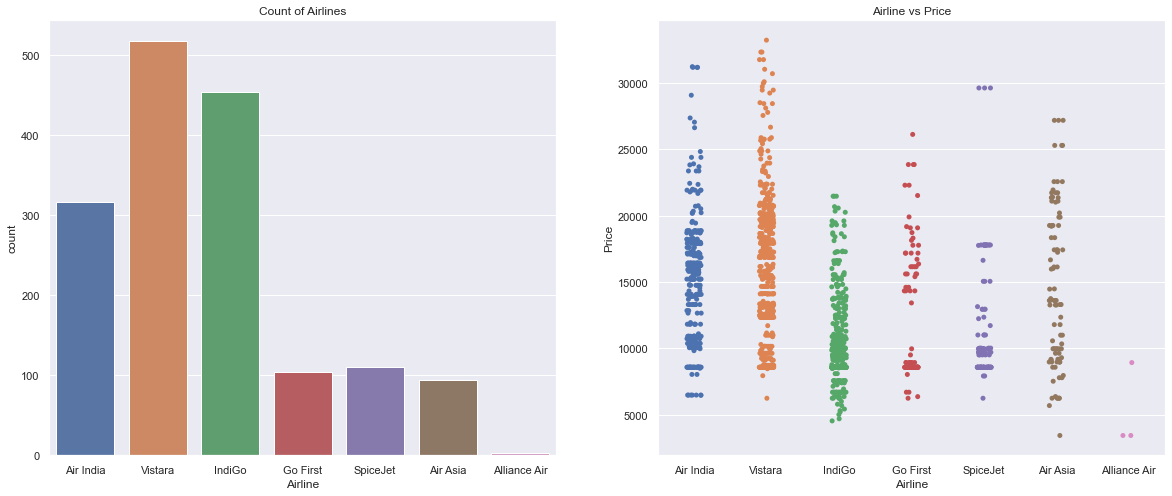

In [21]:
#checking the count of Airline and the relation between Airline and Price
sns.set_theme()
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Airline)
plt.title('Count of Airlines')

plt.subplot(1,2,2)
sns.stripplot(x='Airline',y='Price', data=df)
plt.title('Airline vs Price')

- The count of Vistara airline is highest, followed by Indigo and then Air India.
- The count of airline is lowest for Alliance Air followed by Air Asia.
- From the Airline Vs Price plot, we see that the flight price for Vistara is highest, which is followed by Air India, Air Asia and then Go First Airline.
- The flight price is least for Alliance Air airline and then Indigo.

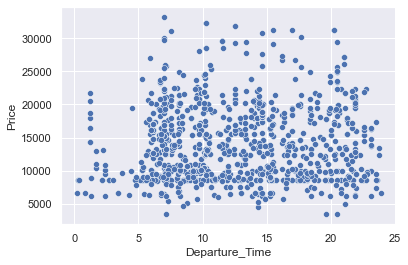

In [22]:
#checking the relation between Dep_Time and Price
sns.scatterplot(x='Departure_Time',y='Price',data=df)
plt.show()

Above scatter plot is showing the relationship between Departure time and flight prices. We can observe that there are very few flights departing in the early morning which are having lower price as well.

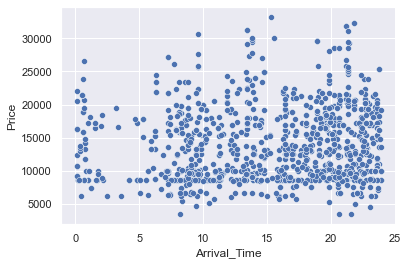

In [23]:
#checking the relation between Arrival_Time and Price
sns.scatterplot(x='Arrival_Time',y='Price',data=df)
plt.show()

The above scatter plot is showing relation between Time of arrival and flight prices, which shows that a few number of flights are arriving in the early morning around 0 to 5 am. As We can see in the plot, the flight prices are not much dependent on the time of arrival.

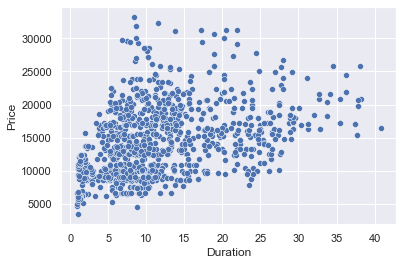

In [24]:
#checking the relation between Duration and Price
sns.scatterplot(x='Duration',y='Price',data=df)
plt.show()

From the above plot, we see that as the overall flight duration increases, the flight prices increases too and that makes direct flight depart and arrive in a relatively shorter period of time.

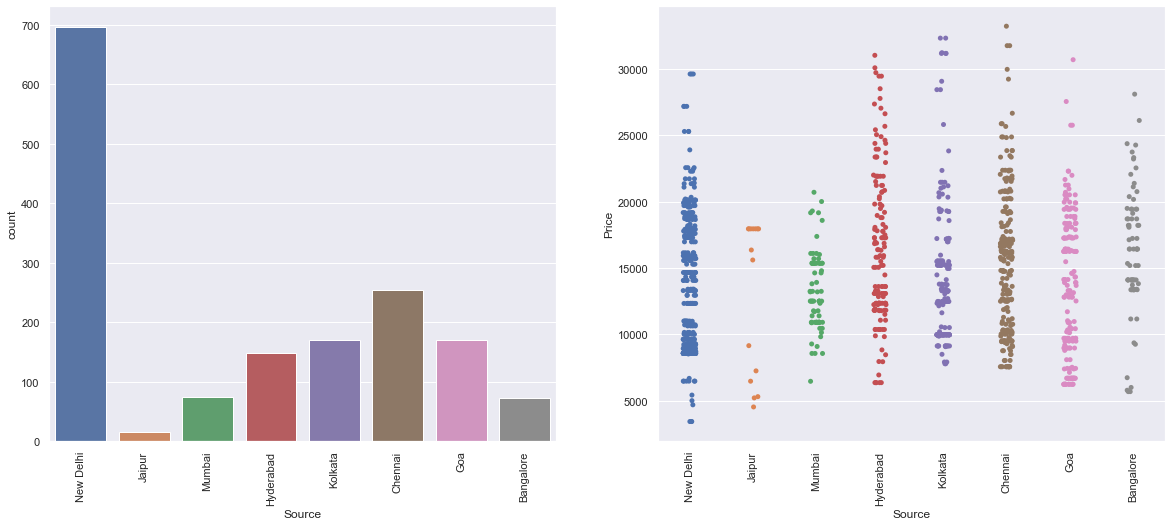

In [25]:
#checking the count and relation of Source with target variable Price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Source)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Source',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

- Majority of flights travel from source New Delhi which is followed by Chennai, Goa, Kolkata and then Hydrabad.
- Other locations from which people like to fly are Mumbai, Bangalore and Jaipur.
- From the source vs price plot, we can see that flight price is the highest from Chennai, which is followed by Kolkata, Hydrabad, and then Goa.
- The flight prices from New Delhi, Bangalore and Goa is almost similar.
- The least flight price is from Mumbai and Jaipur.

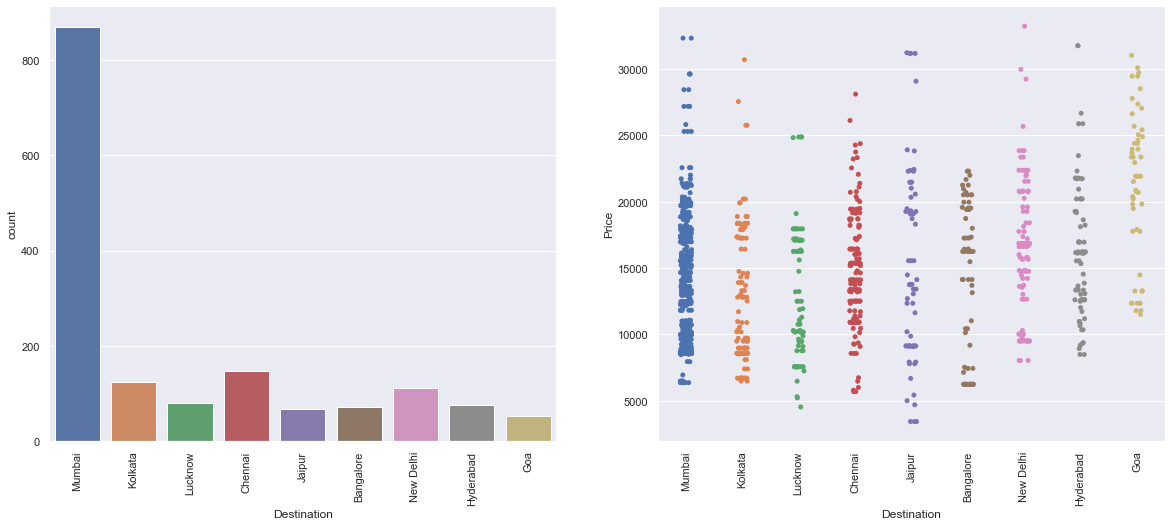

In [26]:
#checking the count and relation of Destination with target variable
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Destination)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Destination',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

- More number of flights fly to Mumbai and then to Chennai.
- The number of flights to Kolkata, Lucknow and Hyderabad is almost similar.
- The number of flights flying to Goa is lowest as compared to the other locations.
- Flight price is highest to travel to New Delhi, then to Mumbai, Hyderabad and Goa.
- To travel to Jaipur and Kolkata, the flight price is similar.
- Prices are low for flights flying to Lucknow and Bangalore.

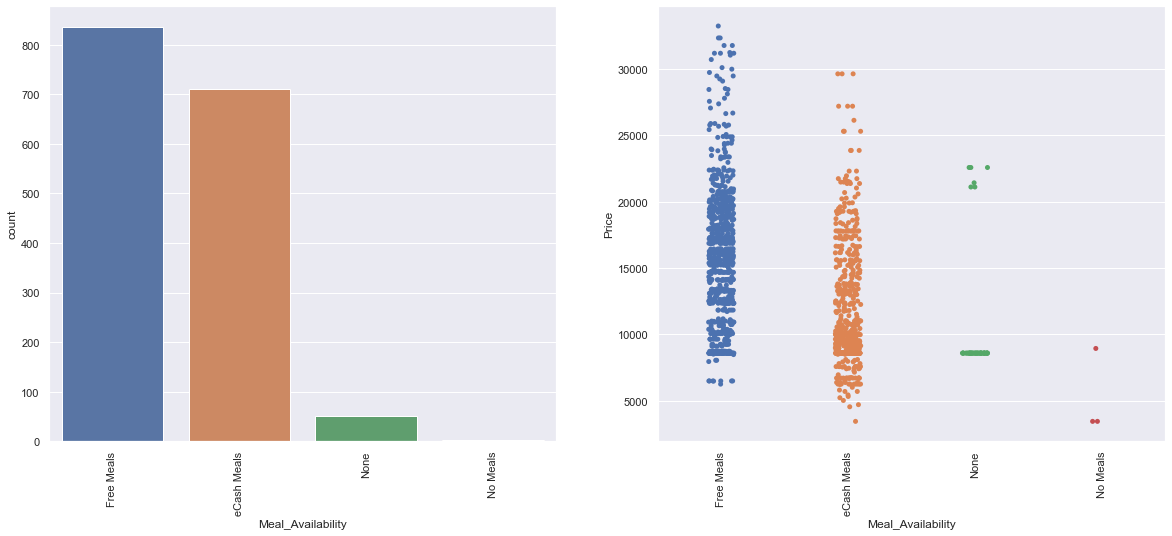

In [27]:
#checking the relation between Meal_Availability and Price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Meal_Availability)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.stripplot(x='Meal_Availability',y='Price',data=df)
plt.xticks(rotation=90)
plt.show()

- From the above plot, we can see that more number of flights offering free meals which are probably for tickets that include those prices and meal services.
- Next, we can see that flights are offering the eCash meals option that can be redeemed to purchase food during long journey flights, mostly with multiple stops.
- Lastly, there are flights that are not offering any meals which may be because they are flying short distances and duration.
- From the Meal_Availability vs Price plot, we can conclude that Flight prices is higher for flights offering free meals, which is followed by Flights offering eCash meals, and lastly flights offering No meals.

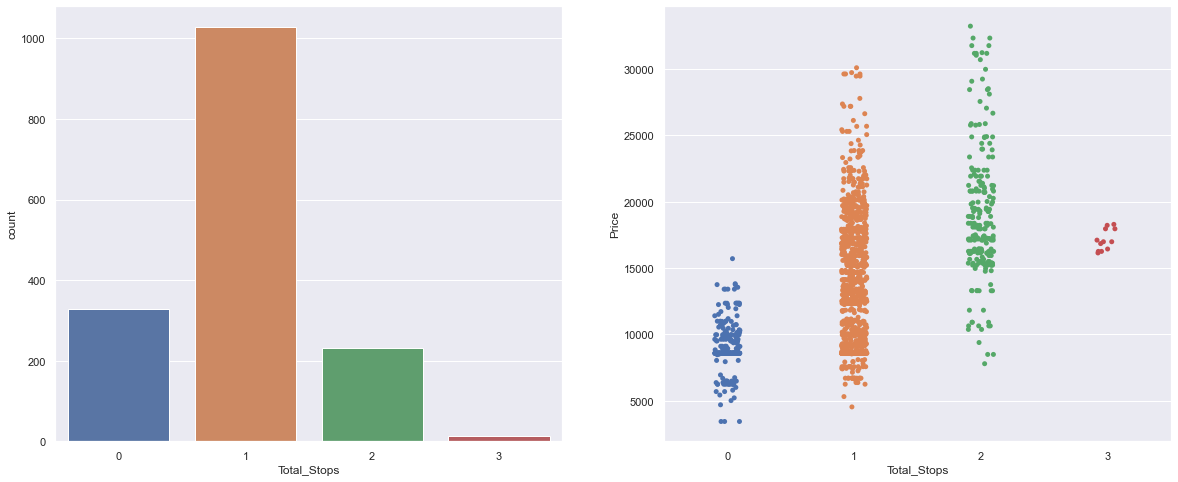

In [28]:
#checking the count of Total_Stops and relation with price
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(df.Total_Stops)

plt.subplot(1,2,2)
sns.stripplot(x='Total_Stops',y='Price',data=df)
plt.show()

- Higher number of People are buying flight tickets that have 1 stop layover.
- Next, we see that people buys flight tickets having no stop, which is followed by people getting 2 stops flight tickets.
- In domestic flights we rarely see 3 stops, hence the number of stops is very less in this case.
- The flight price is the highest for flights having 2 stops, followed by flights having 1 and 3 stops.
- The Non-stop flights tickets price is the least.

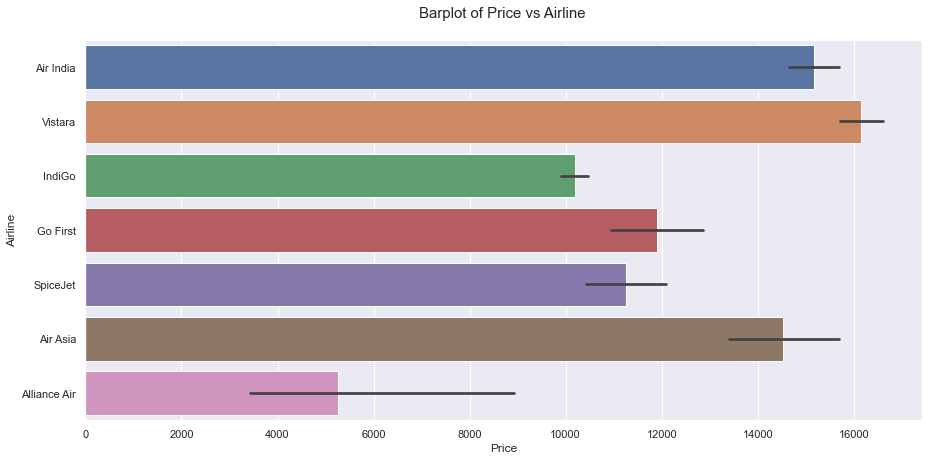

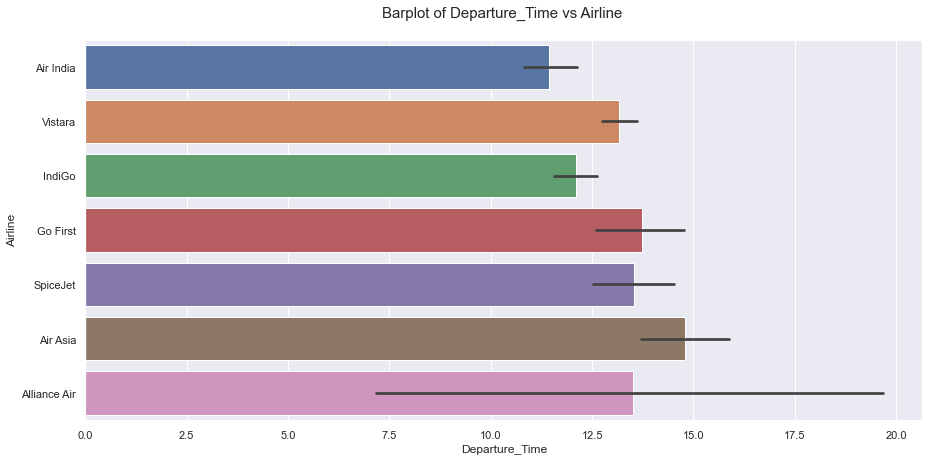

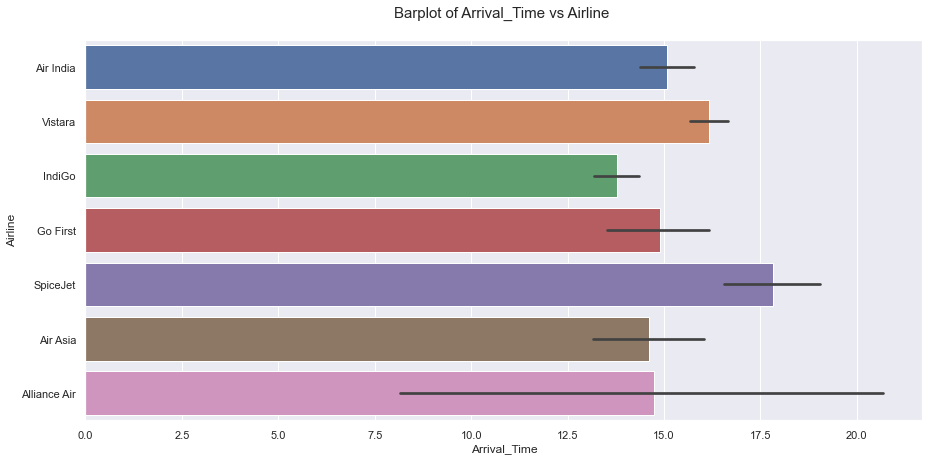

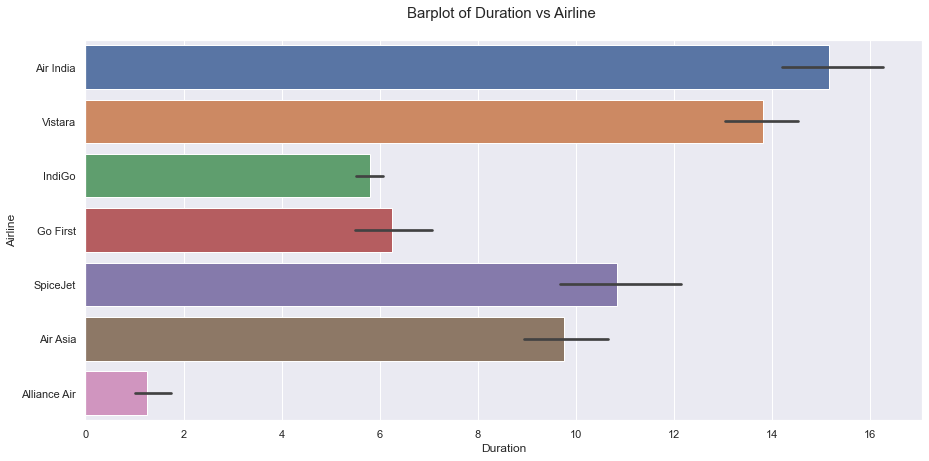

In [29]:
#checking barplot
y = 'Airline'

x = 'Price'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Departure_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Arrival_Time'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

x = 'Duration'
plt.figure(figsize=[15,7])
sns.barplot(x,y,data=df,orient='h')
plt.title(f"Barplot of {x} vs {y} \n", fontsize = 15)
plt.show()

- Comparing the barplots for Flight Prices vs Airline. we can clearly see that Vistara has the highest flight prices while the other airlines like Air India, Air Asia, SpiceJet, Go First, and Indigo lies in the similar price range, whereas Alliance Air has the lowest fare among all.
- When we observe the barplot for Departure time vs Airline we can see that Air Asia takes the highest departure time while Air India takes the least departure time.
- Considering the barplot for Arrival time vs Airline we can see that SpiceJet and Vistara collectively takes the highest arrival time while Indigo takes the least time to arrive at the destination.
- Looking at the barplot for Duration vs Airline, we observe that Air India and Vistara takes the highest flight duration while Indigo and Alliance Air takes the lowest flight duration.

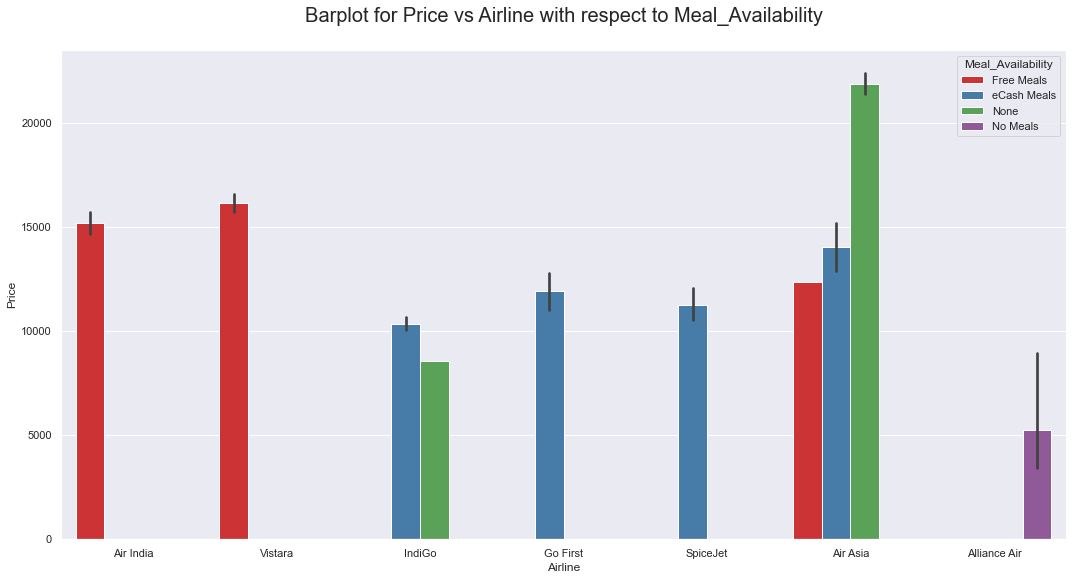

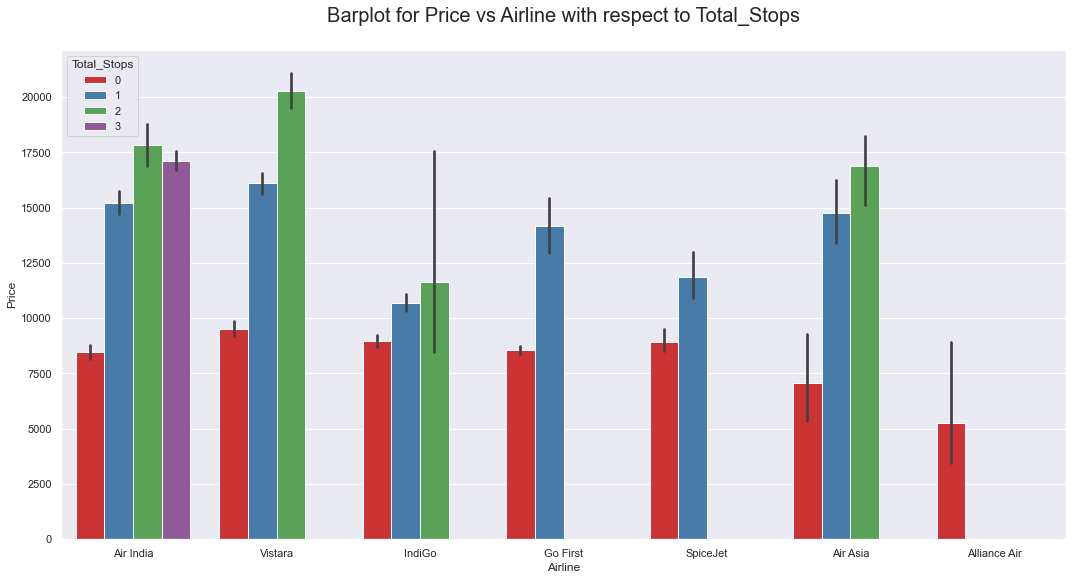

In [30]:
#checking barplots
x = "Price"
y = "Airline"

plt.figure(figsize=(18,9))
sns.barplot(x=df[y], y=df[x], hue=df['Meal_Availability'], palette="Set1", orient='v')
plt.title(f"Barplot for {x} vs {y} with respect to Meal_Availability\n", fontsize = 20)
plt.show()

plt.figure(figsize=(18,9))
sns.barplot(x=df[y], y=df[x], hue=df['Total_Stops'], palette="Set1", orient='v')
plt.title(f"Barplot for {x} vs {y} with respect to Total_Stops\n", fontsize = 20)
plt.show()

- Vistara is having the highest free meal service on their flight as compared to all other flights. While Alliance Air is having the highest no meal option on their flights.
- The eCash meal service is not available for Air India, Vistara and Alliance Air flights.
- As it can see from the second plot that the flights with 0 stops or rather direct flights for every airline is cheaper as compared to 1 or more stops.
- Next, flights with 2 and 3 stops have a considerably high price and number of flights available in those records are high too.
- Alliance Air has only flights available with no stops.

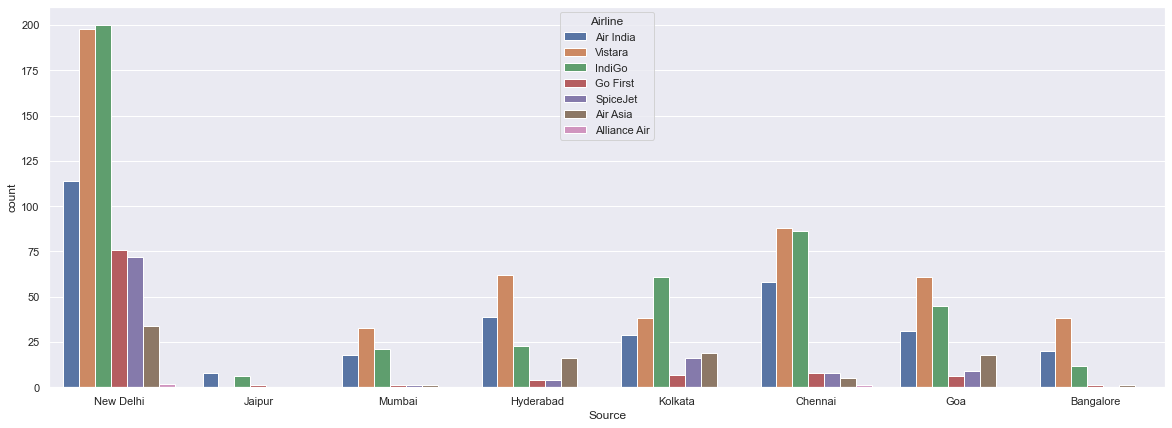

In [31]:
#checking the most popular flights region-wise
plt.figure(figsize=(20,7))
sns.countplot(x = "Source", hue = "Airline", data = df)
plt.show()

- The above plot is showing the region wise count of Airlines that shows that Jaipur is not having any flight of Vistara.
- All cities are having higher count of flight of Vistara compared to other flights.

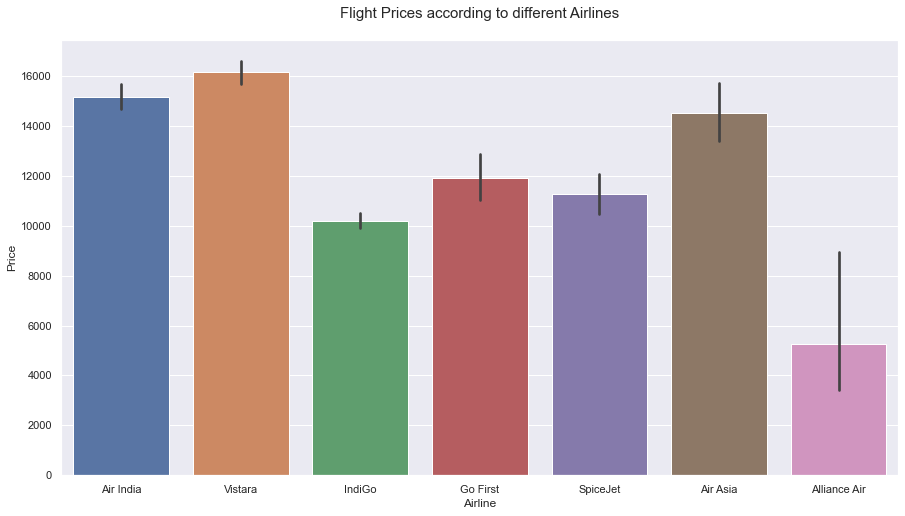

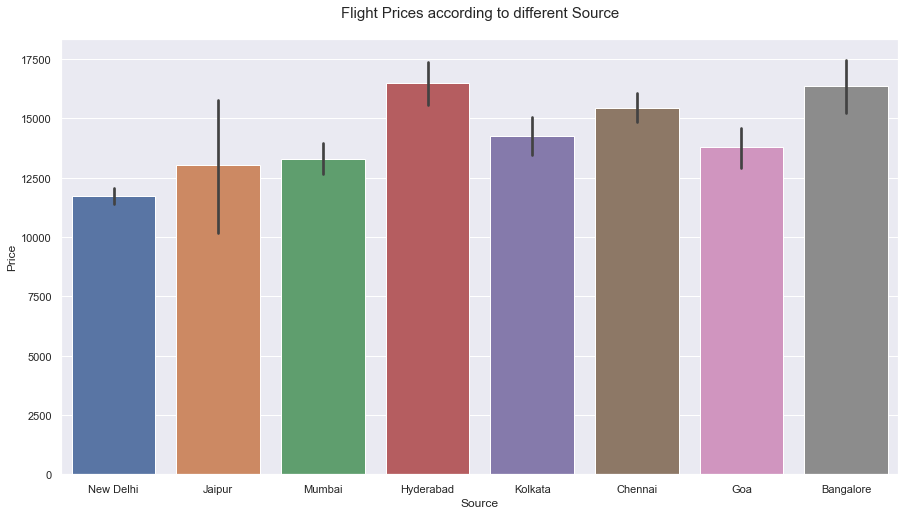

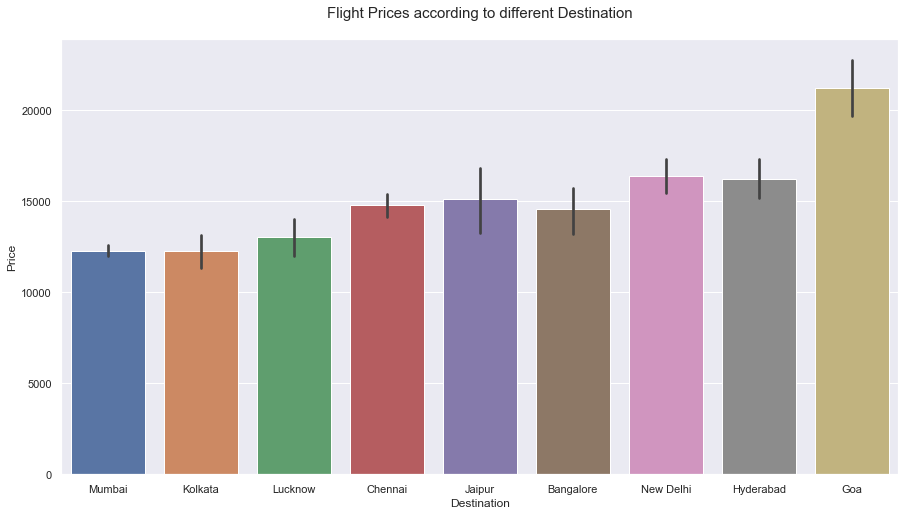

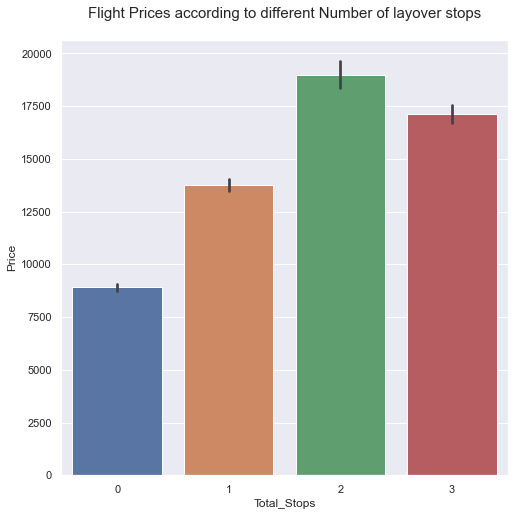

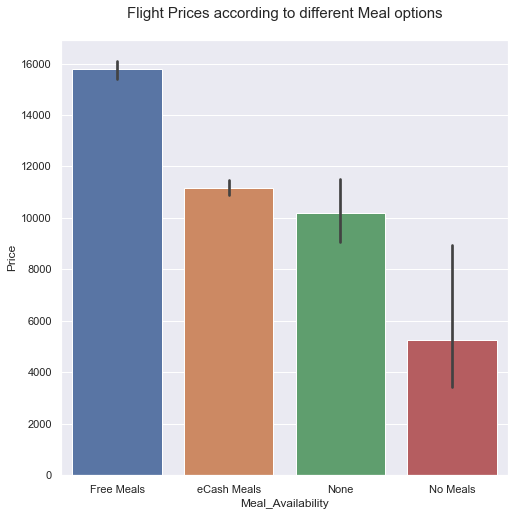

In [32]:
#checking barplots
y = "Price"

x = "Airline"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Airlines\n", fontsize = 15)
plt.show()

x = "Source"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Source\n", fontsize = 15)
plt.show()

x = "Destination"
plt.figure(figsize = (15,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Destination\n", fontsize = 15)
plt.show()

x = "Total_Stops"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Number of layover stops\n", fontsize = 15)
plt.show()

x = "Meal_Availability"
plt.figure(figsize = (8,8))
sns.barplot(data = df, y = y, x = x)
plt.title("Flight Prices according to different Meal options\n", fontsize = 15)
plt.show()

- Airfare in Vistara is quite high as compared to other airlines as they provide free meal service which probably is just meal cost included in the tickets.
- Airfare is almost similar for other remaining Airline while Alliance Air is having the least fare.
- Flight prices when departing from cities like Hyderabad, Bangalore and Chennai is higher, while the others flights are having somewhat similar flight prices except for New Delhi which is having the least fare.
- Similarly prices when arriving from cities like Goa, Hyderabad, and New Delhi is higher, however the lowest price is for Mumbai city, and the rest falls in similar price range.
- From the barplot of Total_Stops, we can see that the flight prices are higher for flights having 2 abd 3 Stops, Whereas prices are cheaper for direct flights and flights having a single stop.
- As per the data collected, we see that free meals service flight tickets cost the highest as compared to flights with no meals service; and the lowest price observed are for eCash meal service wherein the frequent flyers can use their flight points as discounts on the ticket prices.

<Figure size 1440x576 with 0 Axes>

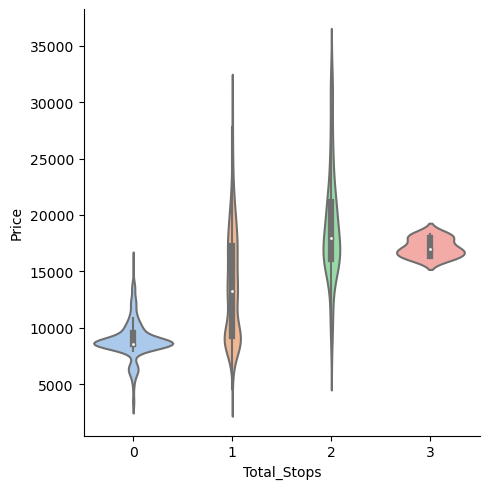

In [33]:
#checking the relation between total_stops and price 
plt.figure(figsize=(20,8))
plt.style.use('default')
sns.catplot(x="Total_Stops", y="Price",
            kind="violin", split=True,
            palette="pastel", data=df)
plt.show()

From the above violin plot, we can conclude that the Price for flights having stops more than 1 costs higher than the flights with stops 1 or none.

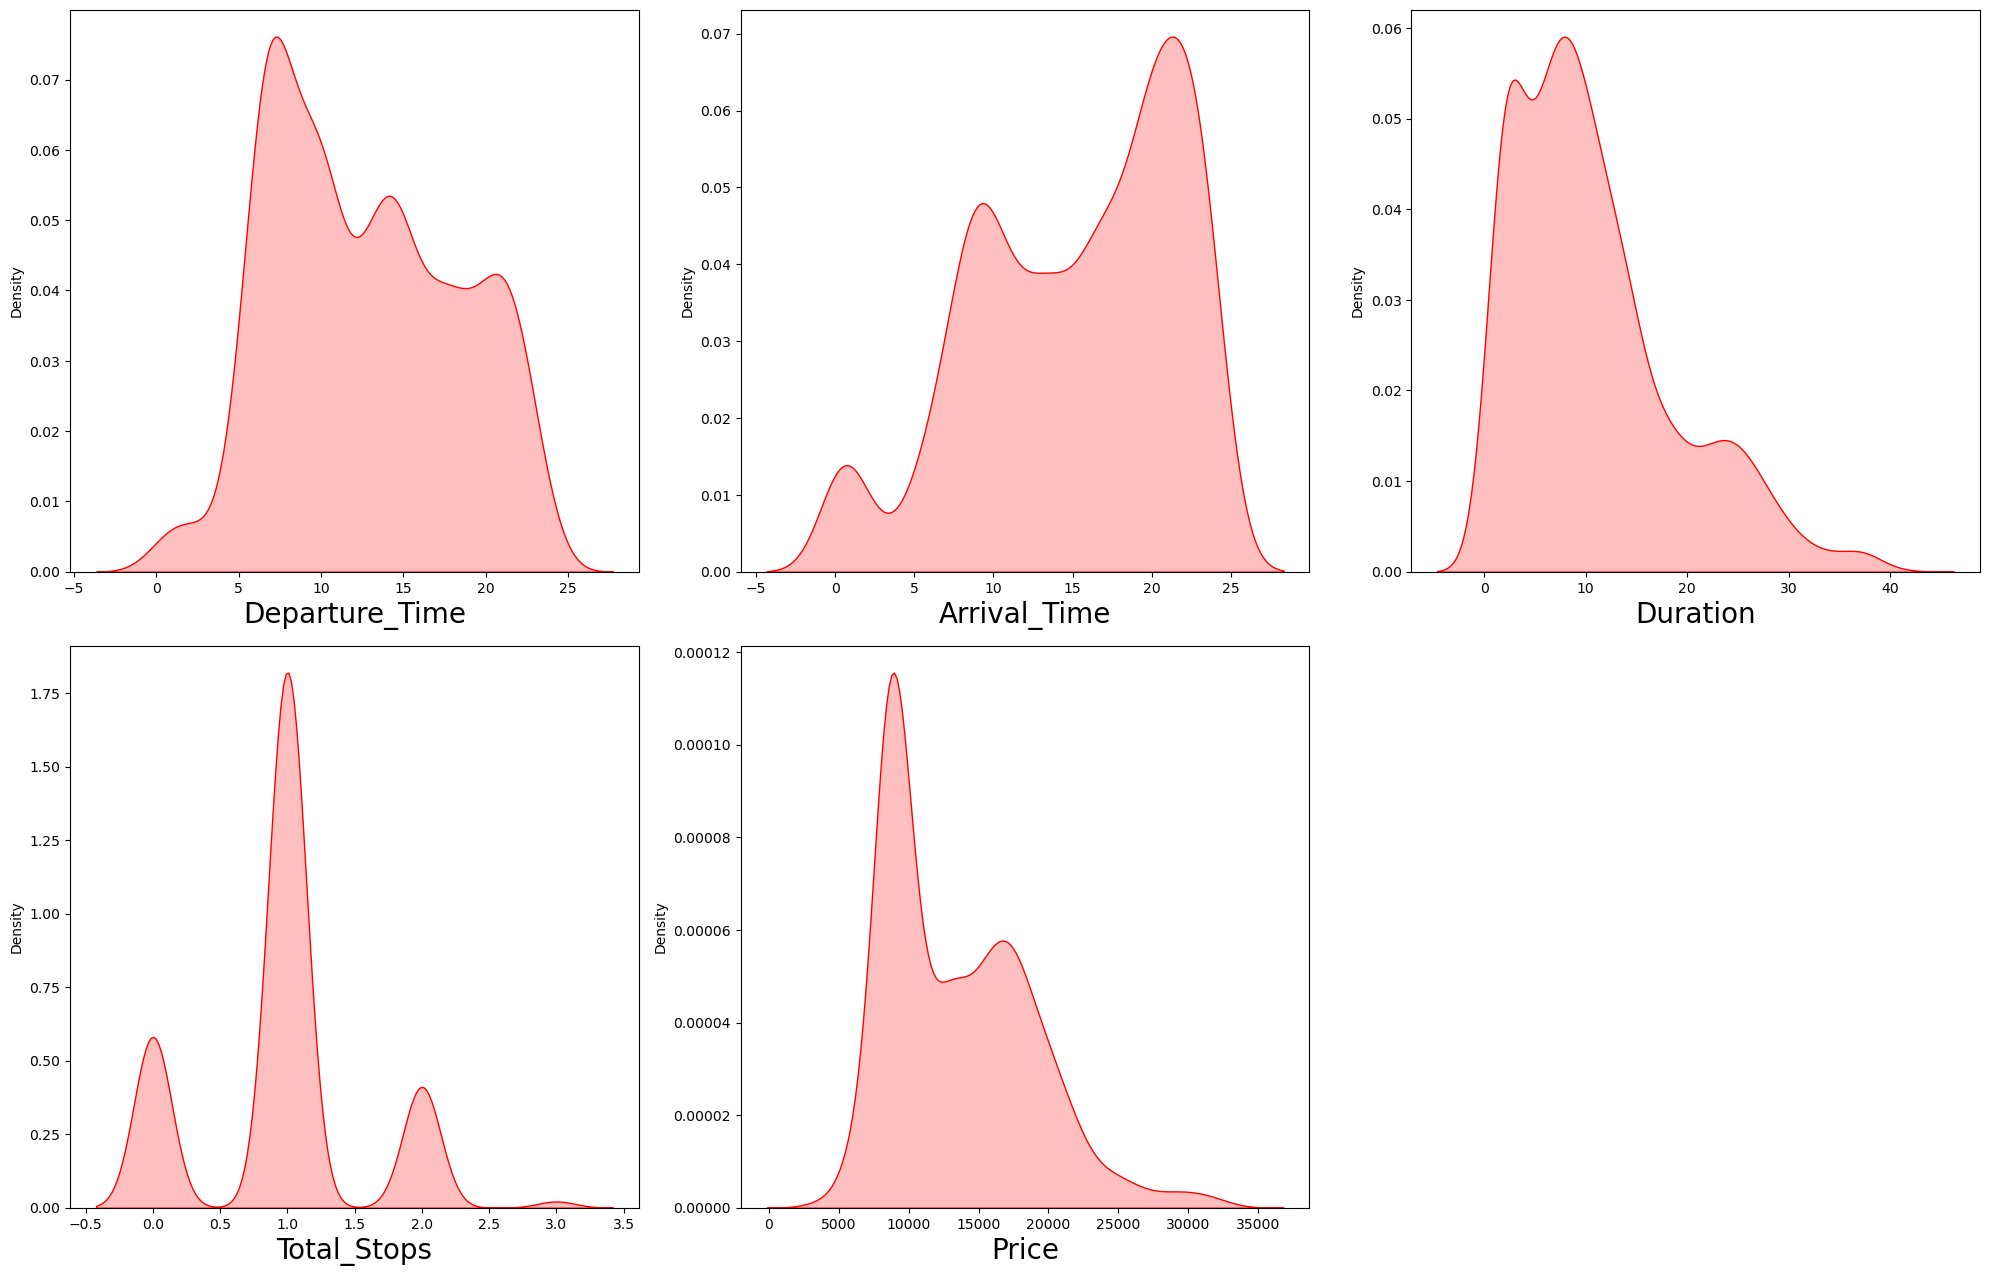

In [34]:
#checking distribution of the data
num_data = df._get_numeric_data()
plt.style.use('default')
plt.figure(figsize = (20,25))
plotnumber = 1
for column in num_data:
    if plotnumber <=12:
        plt.subplot(4,3,plotnumber)
        sns.distplot(num_data[column],hist=False, color="red", kde_kws={"shade": True})
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

Looking at the distribution of the features, we can see that there are some outliers present in our data and data is skewed too. Hence we have to remove both skewness and outliers from our data.

In [35]:
#applying zscore to remove outliers
z_score = zscore(df[['Duration']])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.shape

(1582, 10)

After removing outliers from our data, we see that we did not lose much data.

## Encoding:

In [36]:
#converting categorical data into numeric values using OrdinalEncoder
enc = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes == "object" :
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,1.0,543.0,7.0,7.0,7.000000,9.083333,2.083333,0,0.0,6480.0
1,6.0,1083.0,7.0,7.0,5.916667,7.916667,2.000000,0,0.0,8578.0
2,6.0,1068.0,7.0,7.0,14.333333,16.500000,2.166667,0,0.0,8578.0
3,6.0,1056.0,7.0,7.0,15.500000,17.666667,2.166667,0,0.0,8578.0
4,6.0,1059.0,7.0,7.0,16.916667,19.083333,2.166667,0,0.0,8578.0
...,...,...,...,...,...,...,...,...,...,...
1595,1.0,492.0,5.0,4.0,15.500000,13.416667,21.916667,2,0.0,29082.0
1596,1.0,495.0,5.0,4.0,20.250000,13.416667,17.166667,2,0.0,31182.0
1597,1.0,496.0,5.0,4.0,20.250000,13.416667,17.166667,2,0.0,31182.0
1598,1.0,500.0,5.0,4.0,17.000000,13.416667,20.416667,2,0.0,31182.0


In [38]:
#Checking the statistical summary of our data
df.describe()

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
count,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000,1582.000000
mean,3.824905,544.280025,4.570796,5.536662,12.734935,15.147071,10.543616,0.943110,1.413401,13469.408344
std,2.025220,322.857812,2.561523,2.379197,5.580009,6.440032,7.521126,0.608229,1.475423,5230.782929
min,0.000000,0.000000,0.000000,0.000000,0.166667,0.083333,0.833333,0.000000,0.000000,3435.000000
25%,1.000000,263.250000,2.000000,4.000000,7.750000,9.750000,5.000000,1.000000,0.000000,8579.000000
50%,4.000000,559.500000,5.000000,7.000000,12.250000,16.416667,8.916667,1.000000,0.000000,12487.000000
75%,6.000000,798.000000,7.000000,7.000000,17.333333,20.666667,14.333333,1.000000,3.000000,17234.750000
max,6.000000,1090.000000,7.000000,8.000000,23.916667,23.916667,34.583333,3.000000,3.000000,33234.000000


Using the describe method, we are a look at all the column value details which is basically it's count, mean, standard deviation, min, 25%, 50%, 75% and max quartile data.

## Heatmap to check correlation

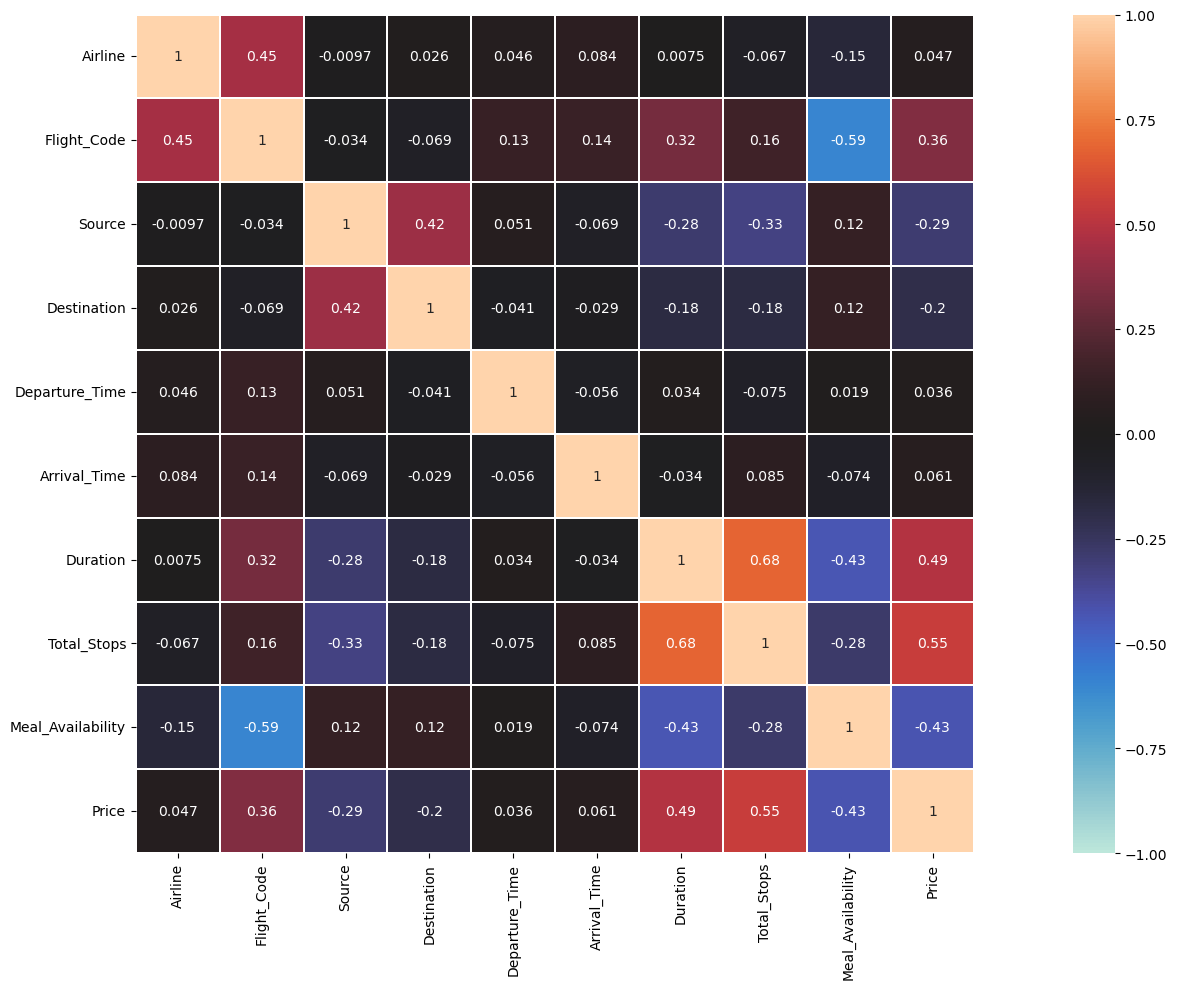

In [39]:
#plotting heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,10))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

From the above correlation heatmap, we can see that except for Total_Stops and Duration, all other features is having negative correlation with our target 'Price'.

In [40]:
#checking the skewness
df.skew()

Airline             -0.520611
Flight_Code         -0.015947
Source              -0.421003
Destination         -1.162353
Departure_Time       0.171818
Arrival_Time        -0.513767
Duration             0.914182
Total_Stops          0.231114
Meal_Availability    0.106460
Price                0.859952
dtype: float64

There is skewness present in our data.

In [41]:
#shuffling our data to get better result while evaluating
df = df.sample(frac = 1)
df.reset_index(inplace = True)
df.drop(columns = 'index', inplace = True)

In [42]:
df

,Airline,Flight_Code,Source,Destination,Departure_Time,Arrival_Time,Duration,Total_Stops,Meal_Availability,Price
0,4.0,124.0,7.0,7.0,17.000000,19.083333,2.083333,0,3.0,8579.0
1,1.0,517.0,7.0,7.0,18.500000,16.416667,21.916667,1,0.0,13305.0
2,6.0,1050.0,7.0,7.0,9.500000,11.583333,2.083333,0,0.0,9630.0
3,4.0,174.0,1.0,8.0,12.000000,18.916667,6.916667,1,3.0,10033.0
4,3.0,560.0,7.0,7.0,11.000000,16.833333,5.833333,1,3.0,8579.0
...,...,...,...,...,...,...,...,...,...,...
1577,6.0,828.0,1.0,8.0,20.500000,9.583333,13.083333,1,0.0,25678.0
1578,0.0,642.0,7.0,7.0,20.000000,7.250000,11.250000,1,3.0,9631.0
1579,6.0,1008.0,7.0,7.0,20.583333,8.666667,12.083333,1,0.0,16980.0
1580,4.0,227.0,7.0,4.0,21.083333,21.916667,0.833333,0,3.0,5009.0


### Splitting the dataset into 2 variables namely 'x' and 'y' for feature and label


In [43]:
x = df.drop(columns = 'Price')
y = df['Price']

In [44]:
#removing the skewness
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
        if x.skew().loc[index]<-0.5:
            x[index]=np.square(x[index])

In [45]:
#checking skewness after removal
x.skew()

Airline             -0.520611
Flight_Code         -0.015947
Source              -0.421003
Destination         -1.162353
Departure_Time       0.171818
Arrival_Time        -0.513767
Duration            -0.278642
Total_Stops          0.231114
Meal_Availability    0.106460
dtype: float64

We have successfully removed lots of skewed data.

## Applying StandardScaler to numerical features

In [46]:
#=applying standard scaler to numerical features to bring them to common scale
numeric = ['Departure_Time','Arrival_Time','Duration']
categorical = ['Airline','Source','Destination','Meal_Availability','Total_Stops']
scaler = StandardScaler()
X_numeric_std = pd.DataFrame(data=scaler.fit_transform(x[numeric]), columns=numeric)
X_std = pd.merge(X_numeric_std, x[categorical], left_index=True, right_index=True)

In [47]:
X_std

,Departure_Time,Arrival_Time,Duration,Airline,Source,Destination,Meal_Availability,Total_Stops
0,0.764589,0.611411,-1.532681,4.0,7.0,7.0,3.0,0
1,1.033491,0.197203,1.287581,1.0,7.0,7.0,0.0,1
2,-0.579920,-0.553548,-1.532681,6.0,7.0,7.0,0.0,0
3,-0.131750,0.585523,-0.206865,4.0,1.0,8.0,3.0,1
4,-0.311018,0.261923,-0.413771,3.0,7.0,7.0,3.0,1
...,...,...,...,...,...,...,...,...
1577,1.392027,-0.864203,0.603031,6.0,1.0,8.0,0.0,1
1578,1.302393,-1.226635,0.406939,0.0,7.0,7.0,3.0,1
1579,1.406966,-1.006587,0.499474,6.0,7.0,7.0,0.0,1
1580,1.496599,1.051507,-2.263634,4.0,7.0,4.0,3.0,0


### Applying log transformation to our target variable

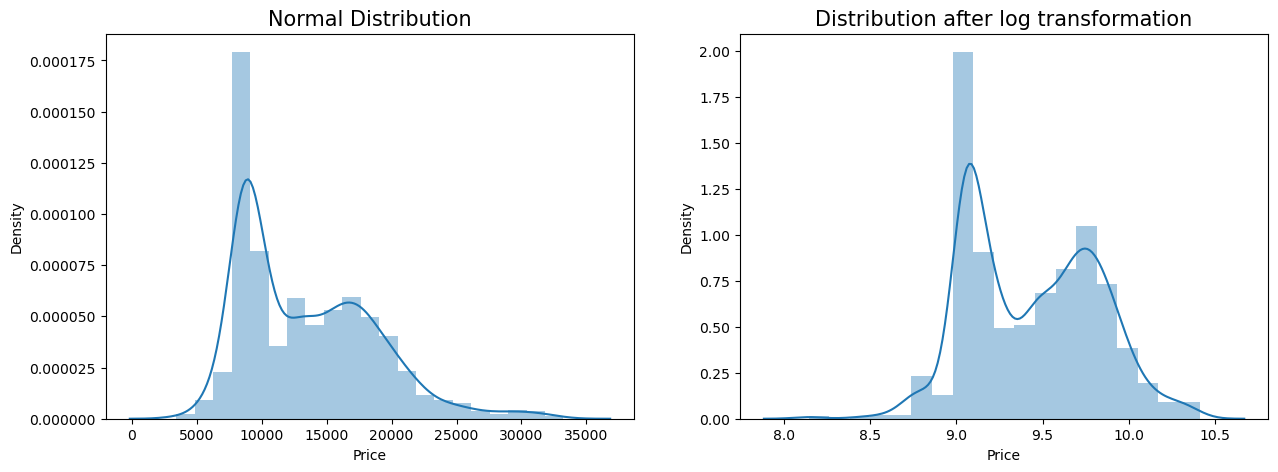

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("Normal Distribution",fontsize=15)
sns.distplot(y)
plt.subplot(1,2,2)
plt.title("Distribution after log transformation",fontsize=15)
sns.distplot(np.log(y))
plt.show()

To get better results we have applied log transformation to our target variable.

### Finding Best Random State

In [61]:
#to find random stat which gives maximum r2_score
max_r_score=0
r_state = 0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(X_std, np.log(y),test_size = 0.25,random_state = r_state)
    reg = DecisionTreeRegressor()
    reg.fit(x_train,y_train)
    y_pred = reg.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        r_state = i
print("max r2 score is",max_r_score,"on Random State",r_state)

max r2 score is 0.6418051796263257 on Random State 4


### Building Machine Learning Model for Regression with Evaluation Metrics:

In [62]:
#lets split our train data into train and test part
x_train, x_test, y_train, y_test = train_test_split(x, np.log(y),test_size = 0.25, random_state =4)

In [63]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
ext = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

In [64]:
#creating a function to train and test the model with evaluation
def BuiltModel(model):
    print('*'*30+model.__class__.__name__+'*'*30)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_train)
    pred = model.predict(x_test)

    r2score = r2_score(y_test,pred)*100

    #evaluation
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test,pred)
    print("MAE :", mae)
    print("RMSE :", rmse)
    print('------------------------------')

    # r2 score
    print(f"Training r2 score:", r2_score(y_train,y_pred)*100,"%")
    print(f"Testing r2 Score:", r2score,"%")
    print('------------------------------')

    #cross validation score
    scores = cross_val_score(model, X_std, np.log(y), cv = 10).mean()*100
    print("\nCross validation score :", scores)

    #result of accuracy minus cv score
    result = r2score - scores
    print("\nAccuracy Score - Cross Validation Score :", result)

    sns.regplot(y_test,pred)
    plt.show()    

******************************LinearRegression******************************
MAE : 0.2326090355692598
RMSE : 0.2806806262880613
------------------------------
Training r2 score: 47.999077845373115 %
Testing r2 Score: 41.70991069602464 %
------------------------------

Cross validation score : 44.58926442606523

Accuracy Score - Cross Validation Score : -2.8793537300405845


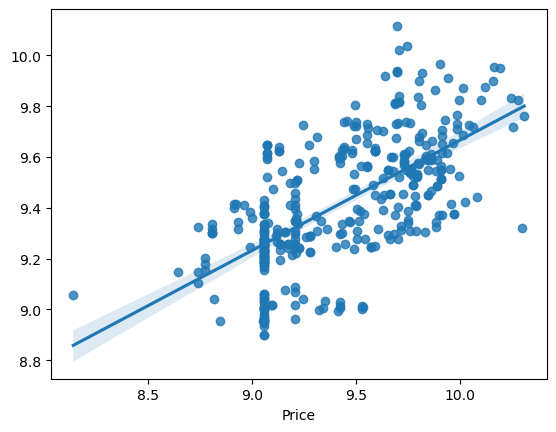

******************************DecisionTreeRegressor******************************
MAE : 0.11637466695532551
RMSE : 0.23869983824080715
------------------------------
Training r2 score: 99.93758933160305 %
Testing r2 Score: 57.8425730377874 %
------------------------------

Cross validation score : 60.60912881401619

Accuracy Score - Cross Validation Score : -2.7665557762287847


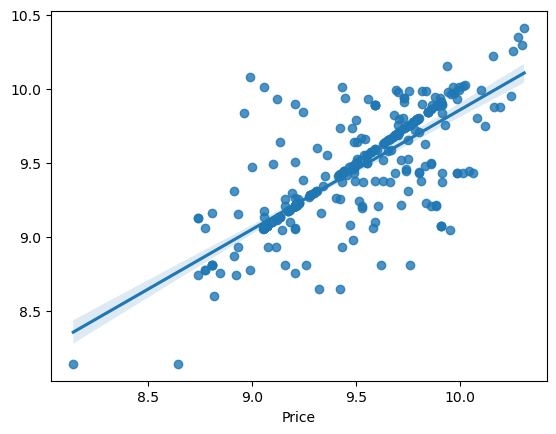

******************************RandomForestRegressor******************************
MAE : 0.09576529789275197
RMSE : 0.15815757873228944
------------------------------
Training r2 score: 97.10050481781465 %
Testing r2 Score: 81.49241033260002 %
------------------------------

Cross validation score : 79.46490581087622

Accuracy Score - Cross Validation Score : 2.027504521723799


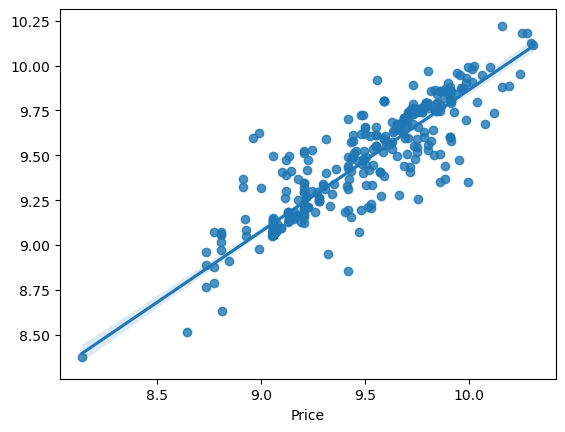

******************************ExtraTreesRegressor******************************
MAE : 0.07593626498316033
RMSE : 0.14556966075484684
------------------------------
Training r2 score: 99.93758933160305 %
Testing r2 Score: 84.32124453473325 %
------------------------------

Cross validation score : 84.75338742630518

Accuracy Score - Cross Validation Score : -0.4321428915719281


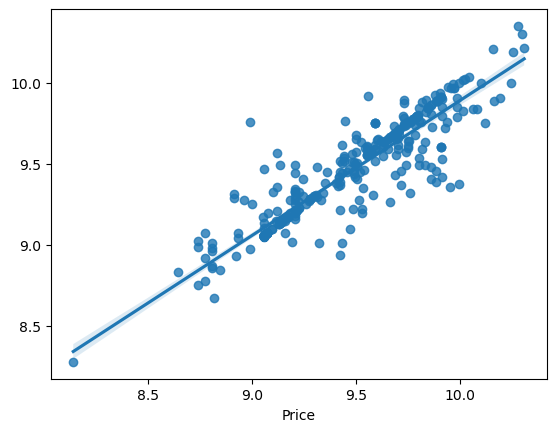

******************************GradientBoostingRegressor******************************
MAE : 0.1477715317346386
RMSE : 0.19484106850284047
------------------------------
Training r2 score: 78.84908298266153 %
Testing r2 Score: 71.91135094366071 %
------------------------------

Cross validation score : 67.5616384859033

Accuracy Score - Cross Validation Score : 4.349712457757406


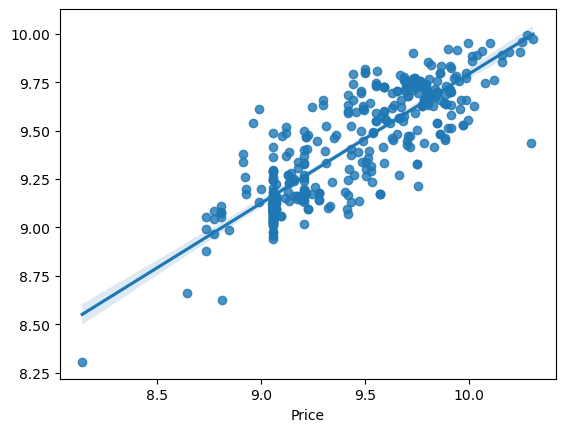

******************************AdaBoostRegressor******************************
MAE : 0.2262281194463008
RMSE : 0.2651729145863417
------------------------------
Training r2 score: 55.787978418941854 %
Testing r2 Score: 47.97307344915899 %
------------------------------

Cross validation score : 50.58858959116377

Accuracy Score - Cross Validation Score : -2.615516142004779


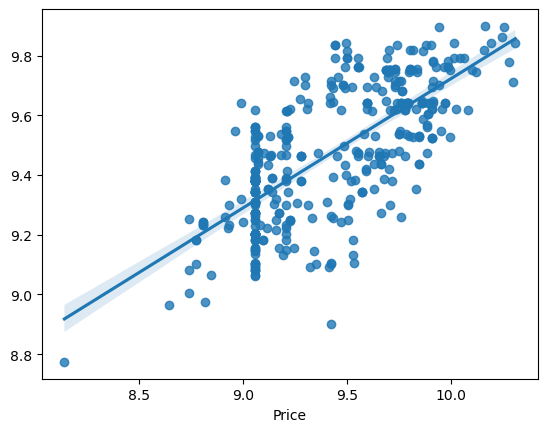

In [73]:
for model in [lr,dt,rf,ext,gbr,abr]:
    BuiltModel(model)

In this project, due to less features and simplicity our model may lead to over-fitting. We can see Linear models showing very less accuracy. We preferred to choose RandomForestRegressor is showing good performance and less difference in r2-score and cv-score so we have selected RandomForestRegressor as our best suitable algorithm for our final model.

## Hyper parameter tuning of our best model:

In [78]:
#selecting different parameters for tuning
grid_params = {
                'max_features': ['sqrt','log2',None],
                'criterion': ["squared_error","absolute_error","poisson"],
                'n_estimators':[800,900,1000]
                }

In [79]:
#train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(RandomForestRegressor(), grid_params,verbose=1,refit=True,n_jobs=-1, cv = 5)
GSCV.fit(x_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [800, 900, 1000]},
             verbose=1)

In [80]:
GSCV.best_params_

{'criterion': 'poisson', 'max_features': 'sqrt', 'n_estimators': 900}

Grid Search CV has provided with the best parameters list out of all the combinations it used to train the model.

## Training and testing our final model with best parameters

In [81]:
model = RandomForestRegressor(max_features = 'sqrt', criterion = 'poisson', n_estimators = 900)
model.fit(x_train,y_train)
pred = model.predict(x_test)

r2score = r2_score(y_test,pred)*100

#evaluation
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,pred)
print("MAE :", mae)
print("RMSE :", rmse)
print('------------------------------')

# r2 score

print(f" \nr2 Score:", r2score,"%")

MAE : 0.09389085107062495
RMSE : 0.15370726948694713
------------------------------
 
r2 Score: 82.51930633566754 %


We have successfully incorporated the Hyper Parameter Tuning on the Final Model and received the R2 score of 82.52% for it.

### Plot of actual vs predicted values

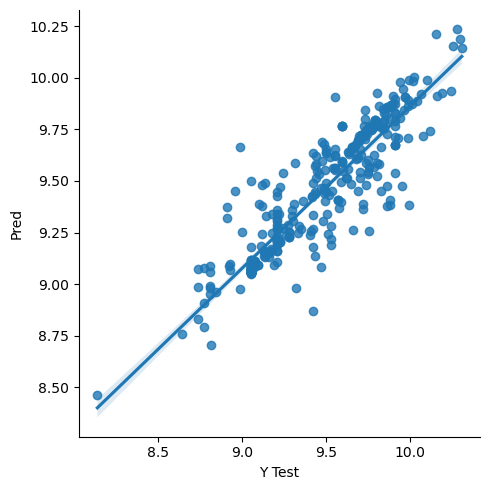

In [82]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
plt.show()

### Prediction of Flight Prices:

In [83]:
predicted_prices = np.exp(pred)

In [84]:
predicted_prices

array([17829.86827438, 10588.81807695,  8611.18191364, 11750.51845403,
       19436.28799335,  8593.42476217,  8578.9420466 , 16599.98378234,
        8670.527436  ,  8576.69038025, 16459.67926161, 19118.27629707,
       17168.78311229,  8609.25241522, 13991.74470911, 12990.75682593,
       16706.48054563, 12638.06370029,  8865.13590644, 10580.20141895,
       17069.50201078, 14488.9051771 , 20042.01697084,  8754.3101323 ,
       11112.3946696 , 11746.93889633,  9991.87899505,  8607.99621102,
       14529.38801679,  8904.3386842 , 19118.27629707, 15745.78997972,
       13341.51046478, 18082.61039561, 15695.17043735, 12379.23088074,
       12211.00220113,  8582.37518102,  8590.4396543 , 13292.17183638,
       10160.06484962,  8841.08639358, 13248.52484551,  8609.25241522,
       14082.34080123,  8579.50550538,  8808.91382979, 10588.81807695,
       15407.73086419,  8675.96230968, 27185.88111308, 15621.25553087,
       10502.96896707,  8812.70848674,  8594.75608737, 14632.32518457,
      

### Saving the final model:

In [85]:
import joblib
joblib.dump(model,"Flight_Price_Prediction.pkl")

['Flight_Price_Prediction.pkl']

### Conclusion:

- In this project, we have scraped the flight data from yatra.com and saved the data in excel file. Then, we have loaded the excel file is into a dataframe to build ML models to predict the flight price.
- After analysing we found that we don't have any missing values in our data set.
- Looking at the data set, we understand that there are some features that needs to be processed like changing the data types, and get the actual value from the string entries from the time related columns.
- After processing the data, we have done some EDA to understand the relation among features and the target variable.
- Features like flight duration, total stops during the journey and the availability of meals are playing major role in predicting the prices of the flights.               

- Looking at the features, we came to know that the number of features are very less due to which we are getting somewhat lower r2-scores.           

- Some algorithms are facing over-fitting problem which may be because of less number of features in our dataset.
- We can get a better r2 score by fetching some more features by web scraping which may help to reduce the over fitting problem in our models.